# Project Overview
### Dataset:
- Source: Crypto News Dataset - https://www.kaggle.com/datasets/oliviervha/crypto-news/data.
- Availability: Also included in the project’s Git repository.

Dataset contains 31037 articles from the 2021-10-12 till the 2023-12-19.
### Goal:
Create a model to classify cryptocurrency news into Positive, Neutral, or Negative sentiments to support investment insights.

In [1]:
import pandas as pd

file_path = "cryptonews.csv"
df_crypto_news = pd.read_csv(file_path)

df_crypto_news.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [2]:
df_crypto_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31037 entries, 0 to 31036
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       31037 non-null  object
 1   sentiment  31037 non-null  object
 2   source     31037 non-null  object
 3   subject    31037 non-null  object
 4   text       31037 non-null  object
 5   title      31037 non-null  object
 6   url        31037 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


## Preprocessing

In [3]:
df_crypto_news.loc[0, 'sentiment']

"{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}"

In [4]:
# Convert 'data' column to datetime, standardize the date format to ensure single-digit days and months have leading zeros
df_crypto_news['date'] = df_crypto_news['date'].str.strip()
df_crypto_news['date'] = df_crypto_news['date'].apply(
    lambda x: '-'.join([
        f"{int(part):02d}" for part in x[:10].split('-')
    ]) if isinstance(x, str) else x
)
df_crypto_news['date'] = pd.to_datetime(df_crypto_news['date'], errors='coerce')

# Get sentiment from a json format
df_crypto_news['sentiment'] = df_crypto_news['sentiment'].apply(lambda x: eval(x)['class'])

# Drop "source" and "url" column
df_crypto_news.drop(columns=["source", "url"], inplace=True)

In [5]:
df_crypto_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31037 entries, 0 to 31036
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       31037 non-null  datetime64[ns]
 1   sentiment  31037 non-null  object        
 2   subject    31037 non-null  object        
 3   text       31037 non-null  object        
 4   title      31037 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ MB


In [6]:
df_crypto_news.head()

,date,sentiment,subject,text,title
0,2023-12-19,negative,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...
1,2023-12-19,neutral,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...
2,2023-12-19,positive,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...
3,2023-12-19,positive,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...
4,2023-12-19,neutral,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...


In [7]:
min_date = df_crypto_news['date'].min()
max_date = df_crypto_news['date'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)


Minimum date: 2021-10-12 00:00:00
Maximum date: 2023-12-19 00:00:00


In [8]:
print(f'Possible Sentiment values: {df_crypto_news["sentiment"].unique()}')

Possible Sentiment values: ['negative' 'neutral' 'positive']


## EDA Summary
- Converted the date column to datetime format.
- Extracted sentiment class (e.g., negative, neutral, positive) from its original JSON-like structure.
- Removed the source and url columns as they were not relevant for model training.
- No data loss: All 31,037 rows were retained after preprocessing.
- Cleaned Data: The dataset now includes the following columns: date, sentiment, subject, text, and title.

# Building the Supervised Learning Model (Logistic Regression classifier)
Step 1: Feature and Target Selection<br>
Step 2: Train-Test
- Data split into 80% training and 20% testing
- Preprocessing with TF-IDF
- Model Training

Step 3: Hyperparameter Tuning<br>
Step 4: Model Evaluation and Insights<br>
Step 5: Save the model


## Step 1: Feature and Target Selection

In [9]:
# Features: text and title
X = df_crypto_news['title'] + " " + df_crypto_news['text']

# Target variable: sentiment
y = df_crypto_news['sentiment']

## Step 2: Train-Test

In [10]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Preprocess text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6819
              precision    recall  f1-score   support

    negative       0.71      0.44      0.55      1350
     neutral       0.64      0.72      0.67      2077
    positive       0.71      0.77      0.74      2781

    accuracy                           0.68      6208
   macro avg       0.69      0.64      0.65      6208
weighted avg       0.69      0.68      0.68      6208



## Step 3: Hyperparameter Tuning (GridSearchCV)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    # 'penalty': ['l2', 'l1'],  # l1 requires saga or liblinear
   # 'solver': ['liblinear', 'saga']
    'penalty': ['l1'],  # Narrowed options
    'solver': ['liblinear']  # Remove redundant solvers
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

# Get the best model
best_model = grid.best_estimator_
print(f"Best Params: {grid.best_params_}")

# Evaluate the best model
y_pred_best = best_model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7257


## Step 4: Model Evaluation and Insights

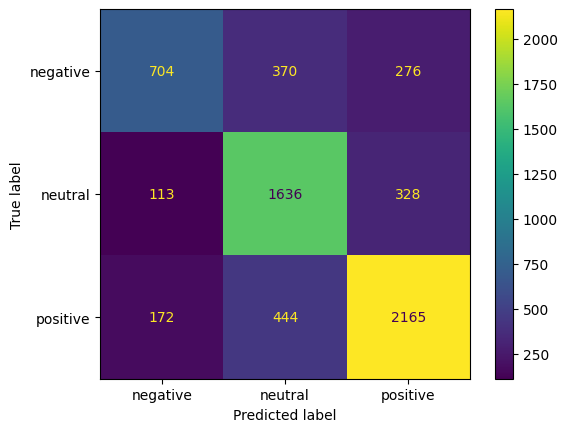

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

### Confusion Matrix Summary
The model's performance is summarized as follows:
- Positive Sentiment: Correctly identified 704 articles but often confused with Negative (370) or Neutral (276) sentiments.
- Negative Sentiment: Strongest performance with 1636 correctly classified, but some were mistaken for Neutral (328).
- Neutral Sentiment: Best classification with 2165 correct predictions, though occasionally confused with Negative (444).

### Key Insights:
The model performs well overall but struggles slightly to differentiate Positive and Neutral from Negative sentiments.

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

    negative       0.71      0.52      0.60      1350
     neutral       0.67      0.79      0.72      2077
    positive       0.78      0.78      0.78      2781

    accuracy                           0.73      6208
   macro avg       0.72      0.70      0.70      6208
weighted avg       0.73      0.73      0.72      6208



### Classification report Summary:
The model performs best with Positive and Neutral sentiments, while Negative sentiment has slightly lower recall, indicating room for improvement in identifying Negative articles.
- Precision: The percentage of predictions that were correct for a specific class (e.g., how many of the predicted "Negative" articles were actually Negative).
- Recall: The percentage of actual instances of a class that were correctly identified by the model (e.g., how many of the actual "Negative" articles were correctly classified as Negative).
- F1-Score: Measures the model accuracy, which is 73%.

## Step 5: Save the model

In [15]:
from joblib import dump, load

dump(best_model, 'sentiment_best_model.joblib')
dump(vectorizer, 'sentiment_tfidf_vectorizer.joblib')

['sentiment_tfidf_vectorizer.joblib']

# Analyzing Bitcoin Price Changes Based on Sentiment
I was curious, so why not analyze it?<br>
This section aims to analyze how the daily sentiment of cryptocurrency news correlates with Bitcoin's price changes.<br>
By grouping sentiment data and merging it with Bitcoin's historical price data, we can explore trends and insights.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Bitcoin Data
file_path = "Bitcoin Historical Data.csv"
df_btc_data = pd.read_csv(file_path)

df_btc_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/19/2023,"42,259.3","42,659.7","43,473.3","41,842.7",55.29K,-0.94%
1,12/18/2023,"42,659.7","41,369.1","42,728.0","40,554.0",61.58K,3.12%
2,12/17/2023,"41,368.7","42,271.7","42,413.2","41,276.9",35.46K,-2.14%
3,12/16/2023,"42,271.7","41,929.0","42,690.3","41,698.2",30.11K,0.82%
4,12/15/2023,"41,929.0","43,025.2","43,080.7","41,697.9",45.28K,-2.55%


In [17]:
# Preprocess Bitcoin Data
df_btc_data["Date"] = pd.to_datetime(df_btc_data["Date"])
df_btc_data.drop(columns=["Open", "High", "Low", "Vol."], inplace=True)
df_btc_data.rename(columns={"Date": "date", "Price": "price", "Change %": "change"}, inplace=True)
df_btc_data["change"] = df_btc_data["change"].str.rstrip("%").astype(float)
df_btc_data["price"] = df_btc_data["price"].str.replace(",", "").astype(float)
df_btc_data.head()

,date,price,change
0,2023-12-19,42259.3,-0.94
1,2023-12-18,42659.7,3.12
2,2023-12-17,41368.7,-2.14
3,2023-12-16,42271.7,0.82
4,2023-12-15,41929.0,-2.55


In [18]:
df_btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    799 non-null    datetime64[ns]
 1   price   799 non-null    float64       
 2   change  799 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.9 KB


## Merge Sentiment Data with Bitcoin Data

In [19]:
sentiment_grouped = df_crypto_news.groupby("date")["sentiment"].value_counts().unstack(fill_value=0)
sentiment_grouped["total"] = sentiment_grouped.sum(axis=1)

for sentiment in ["positive", "neutral", "negative"]:
    sentiment_grouped[f"{sentiment}_proportion"] = sentiment_grouped[sentiment] / sentiment_grouped["total"]

sentiment_grouped.reset_index(inplace=True)
sentiment_grouped.head()


sentiment,date,negative,neutral,positive,total,positive_proportion,neutral_proportion,negative_proportion
0,2021-10-12,0,0,1,1,1.0,0.0,0.0
1,2021-10-15,0,1,0,1,0.0,1.0,0.0
2,2021-10-18,0,0,1,1,1.0,0.0,0.0
3,2021-10-19,0,0,1,1,1.0,0.0,0.0
4,2021-10-27,0,1,0,1,0.0,1.0,0.0


In [20]:
# Merge Bitcoin price data with sentiment proportions
merged_data = pd.merge(df_btc_data, sentiment_grouped, on="date", how="inner")
merged_data.head()


,date,price,change,negative,neutral,positive,total,positive_proportion,neutral_proportion,negative_proportion
0,2023-12-19,42259.3,-0.94,3,4,3,10,0.300000,0.400000,0.300000
1,2023-12-18,42659.7,3.12,11,17,33,61,0.540984,0.278689,0.180328
2,2023-12-17,41368.7,-2.14,2,8,12,22,0.545455,0.363636,0.090909
3,2023-12-16,42271.7,0.82,6,6,4,16,0.250000,0.375000,0.375000
4,2023-12-15,41929.0,-2.55,20,24,20,64,0.312500,0.375000,0.312500


## Pltos for understaing what's behind of merged data

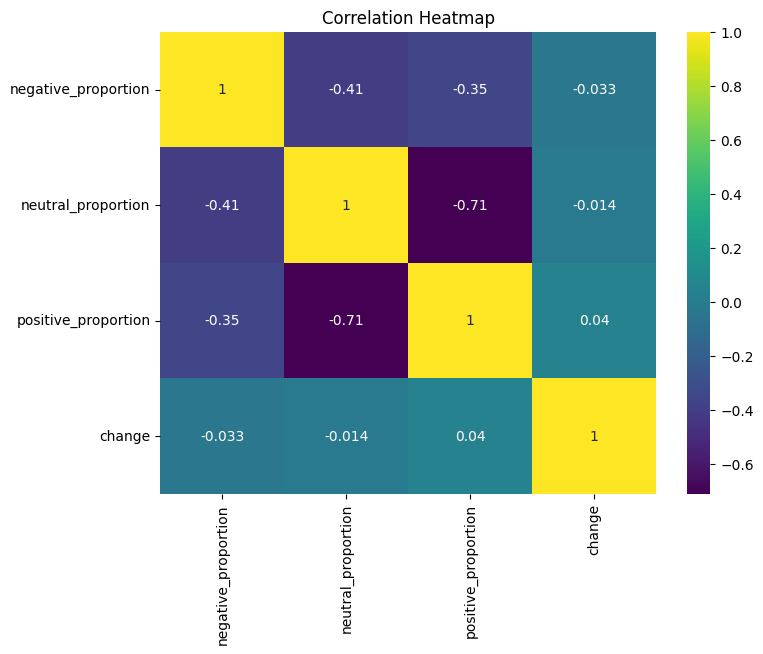

In [21]:
# Create correlation heatmap
corr_matrix = merged_data[['negative_proportion', 'neutral_proportion', 'positive_proportion', 'change']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


### Summary of the Correlation Heatmap:
Sentiments vs. Price Change:<br>
- Negative Sentiment and Price Change: Weak negative correlation (-0.033), suggesting little to no relationship between Negative sentiment and Bitcoin price changes.
- Neutral Sentiment and Price Change: Very weak negative correlation (-0.014), indicating almost no association.
- Positive Sentiment and Price Change: Weak positive correlation (0.04), showing a slightly better (but still minimal) relationship compared to other sentiments.

To better understand the relationship between sentiments and Bitcoin price changes, let's grouped the data by month.


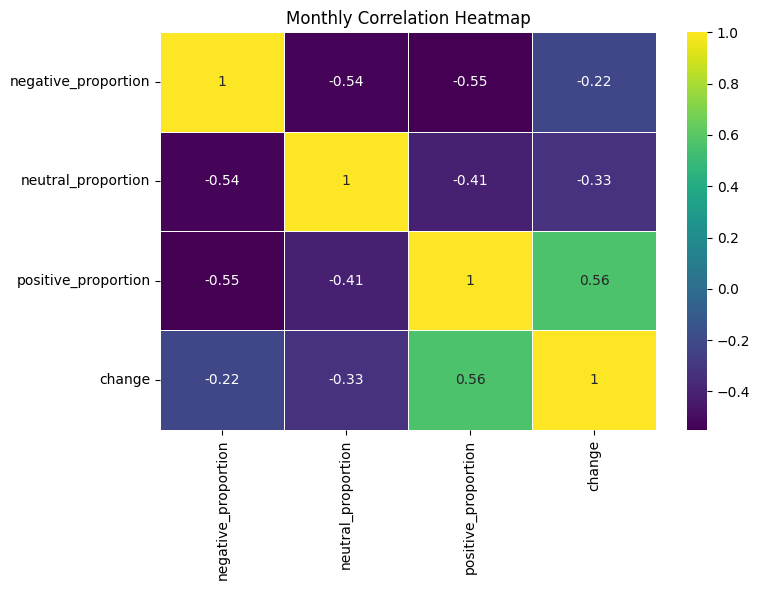

In [22]:
monthly_data = merged_data.copy()
monthly_data['month'] = monthly_data['date'].dt.to_period('M')
monthly_grouped = monthly_data.groupby('month').mean().reset_index()

corr_matrix_monthly = monthly_grouped[['negative_proportion', 'neutral_proportion', 'positive_proportion', 'change']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_monthly, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Monthly Correlation Heatmap')
plt.tight_layout()
plt.show()


### Summary of the monthly correlation
- Moderate positive correlation to the price change: 0.56
- Weak negative correlation with both negative_proportion (-0.22) and neutral_proportion (-0.33) to the price change

### Key Insight:
Positive sentiment appears to be the strongest predictor of monthly Bitcoin price increases,<br>
while negative and neutral sentiments show weaker, negative associations.<br>
This suggests that overall market optimism is a crucial driver of price trends.

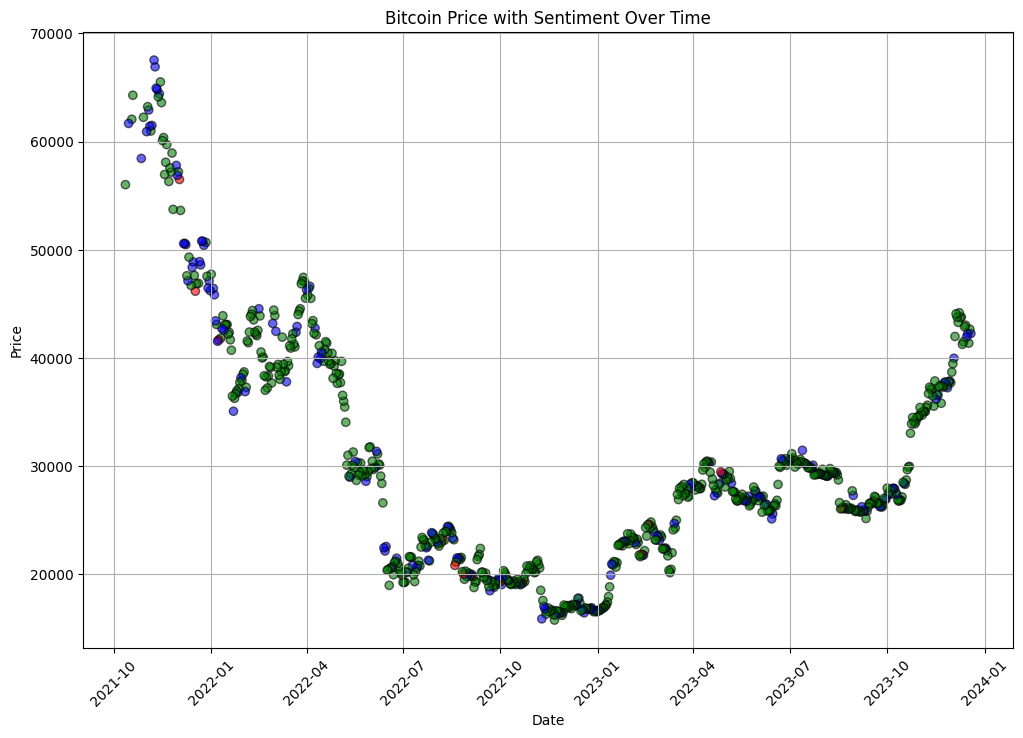

In [23]:
# Create scatter plot
merged_data["dominant_sentiment"] = merged_data[["positive_proportion", "neutral_proportion", "negative_proportion"]].idxmax(axis=1)

sentiment_colors = {
    "positive_proportion": "green",
    "neutral_proportion": "blue",
    "negative_proportion": "red"
}
merged_data["sentiment_color"] = merged_data["dominant_sentiment"].map(sentiment_colors)


plt.figure(figsize=(12, 8))
plt.scatter(
    merged_data["date"], 
    merged_data["price"], 
    c=merged_data["sentiment_color"], 
    alpha=0.6, 
    edgecolors="k"
)
plt.title("Bitcoin Price with Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [24]:
def sum_total_number_of(data: pd.DataFrame, column: str) -> int:
    return data[column].sum()
    
total_negative_articles = sum_total_number_of(data=merged_data, column='negative')
total_positive_articles = sum_total_number_of(data=merged_data, column='positive')
total_neutral_articles = sum_total_number_of(data=merged_data, column='neutral')

print(f"Total number of negative articles: {total_negative_articles}")
print(f"Total number of positive articles: {total_positive_articles}")
print(f"Total number of neutral articles: {total_neutral_articles}")

Total number of negative articles: 6518
Total number of positive articles: 13964
Total number of neutral articles: 10555


## Summary: Bitcoin Price and Sentiment Over Time
#### The scatter plot 
It visualizes Bitcoin price trends over time, with each data point colored to represent the dominant sentiment of news articles during that period:
- Positive sentiment is shown in green, neutral sentiment in blue, and negative sentiment in red.
- The chart demonstrates that the dataset is dominated by positive and neutral sentiments, while negative sentiment appears less frequently.

### Key Observations:

Despite the frequency of positive and neutral sentiments, there is no clear correlation between positive sentiment and a significant increase in Bitcoin prices.<br>
Price movements seem to be affected by factors beyond sentiment alone.<br>
A large number of neutral articles could weaken potential conclusions from sentiment analysis.<br>
Reclassifying neutral articles as positive or negative (based on additional indicators or context) could provide a more practical understanding of the impact of sentiment on Bitcoin price trends.